In [28]:
# imports
import pandas as pd
import numpy as np
import json
import sklearn
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler


In [51]:
# Data manipulations json->dataframe

# Load the JSON data
dir1 = 'C:/Users/55387/Desktop/acndata_sessionsfor2018.json'
# Load the JSON data
with open(dir1) as f:
    data1 = json.load(f)
dir2 = 'C:/Users/55387/Desktop/acndata_sessionsfor2019.json'
# Load the JSON data
with open(dir2) as f:
    data2 = json.load(f)

items = data1['_items']
flat_data = []
for item in items:
    flat_item = {
        'sessionID': item['sessionID'],
        'connectionTime': item['connectionTime'],
        'disconnectTime': item['disconnectTime'],
        'doneChargingTime': item['doneChargingTime'],
        'kWhDelivered': item['kWhDelivered'],
        'userID': item['userID'],
        'WhPerMile': None,
        'kWhRequested': None,
        'milesRequested': None,
        'minutesAvailable': None,
        'modifiedAt': None,
        'paymentRequired': None,
        'requestedDeparture': None,
    }

    user_inputs = item.get('userInputs')
    if user_inputs:
        user_input = user_inputs[0]  # Take the first user input if available
        flat_item.update({
            'WhPerMile': user_input.get('WhPerMile'),
            'kWhRequested': user_input.get('kWhRequested'),
            'milesRequested': user_input.get('milesRequested'),
            'minutesAvailable': user_input.get('minutesAvailable'),
            'modifiedAt': user_input.get('modifiedAt'),
            'paymentRequired': user_input.get('paymentRequired'),
            'requestedDeparture': user_input.get('requestedDeparture'),
        })

    flat_data.append(flat_item)
items = data2['_items']
for item in items:
    flat_item = {
        'sessionID': item['sessionID'],
        'connectionTime': item['connectionTime'],
        'disconnectTime': item['disconnectTime'],
        'doneChargingTime': item['doneChargingTime'],
        'kWhDelivered': item['kWhDelivered'],
        'userID': item['userID'],
        'WhPerMile': None,
        'kWhRequested': None,
        'milesRequested': None,
        'minutesAvailable': None,
        'modifiedAt': None,
        'paymentRequired': None,
        'requestedDeparture': None,
    }

    user_inputs = item.get('userInputs')
    if user_inputs:
        user_input = user_inputs[0]  # Take the first user input if available
        flat_item.update({
            'WhPerMile': user_input.get('WhPerMile'),
            'kWhRequested': user_input.get('kWhRequested'),
            'milesRequested': user_input.get('milesRequested'),
            'minutesAvailable': user_input.get('minutesAvailable'),
            'modifiedAt': user_input.get('modifiedAt'),
            'paymentRequired': user_input.get('paymentRequired'),
            'requestedDeparture': user_input.get('requestedDeparture'),
        })

    flat_data.append(flat_item)
df = pd.DataFrame(flat_data)
print("Number of examples:", len(df))



Number of examples: 25915


In [52]:
df

,sessionID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,2_39_78_362_2018-04-25 11:08:04.400812,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,None,NaN,NaN,NaN,NaN,None,None,None
1,2_39_95_27_2018-04-25 13:45:09.617470,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,None,NaN,NaN,NaN,NaN,None,None,None
2,2_39_79_380_2018-04-25 13:45:49.962001,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,None,NaN,NaN,NaN,NaN,None,None,None
3,2_39_79_379_2018-04-25 14:37:06.460772,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,None,NaN,NaN,NaN,NaN,None,None,None
4,2_39_79_381_2018-04-25 14:40:33.638896,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,None,NaN,NaN,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25910,2_39_95_27_2019-12-31 18:17:03.393252,"Tue, 31 Dec 2019 18:17:03 GMT","Tue, 31 Dec 2019 20:33:01 GMT","Tue, 31 Dec 2019 20:32:56 GMT",15.552,000001039,400.0,80.0,200.0,417.0,"Tue, 31 Dec 2019 18:20:05 GMT",True,"Wed, 01 Jan 2020 01:14:03 GMT"
25911,2_39_79_377_2019-12-31 19:00:33.000737,"Tue, 31 Dec 2019 19:00:33 GMT","Wed, 01 Jan 2020 02:20:51 GMT","Tue, 31 Dec 2019 21:01:39 GMT",6.618,000001124,400.0,8.0,20.0,60.0,"Tue, 31 Dec 2019 19:01:02 GMT",True,"Tue, 31 Dec 2019 20:00:33 GMT"
25912,2_39_129_17_2019-12-31 20:52:35.048425,"Tue, 31 Dec 2019 20:52:35 GMT","Tue, 31 Dec 2019 22:32:13 GMT","Tue, 31 Dec 2019 22:32:01 GMT",5.535,000004622,300.0,6.0,20.0,127.0,"Tue, 31 Dec 2019 20:52:59 GMT",True,"Tue, 31 Dec 2019 22:59:35 GMT"
25913,2_39_131_30_2019-12-31 21:57:22.537470,"Tue, 31 Dec 2019 21:57:23 GMT","Tue, 31 Dec 2019 22:07:22 GMT","Tue, 31 Dec 2019 22:07:17 GMT",0.531,000001920,400.0,8.0,20.0,61.0,"Tue, 31 Dec 2019 21:57:53 GMT",True,"Tue, 31 Dec 2019 22:58:23 GMT"


In [30]:
df.describe()

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
count,25915.000000,11570.000000,11570.000000,11570.000000,11570.000000
mean,8.987814,368.258341,20.082742,59.744944,287.770095
std,8.030147,103.279034,17.031708,53.537404,173.233992
min,0.501000,200.000000,2.000000,10.000000,1.000000
25%,3.560500,292.000000,8.000000,20.000000,141.250000
50%,6.844000,400.000000,15.960000,40.000000,263.000000
75%,12.831000,400.000000,24.000000,80.000000,425.000000
max,75.528000,600.000000,180.000000,300.000000,1913.000000


In [31]:
# clean blank cells
df = df.dropna(subset=["kWhRequested"])
# 因为sessionID这里后面包含了时间，和后面的时间重复，所以在这里定义一个函数来删除时间
# clean blank cells
def remove_time_from_sessionID(session_id):
    parts = session_id.split('_')
    without_time = '_'.join(parts[:-1])

    return without_time
df["sessionID"] = df["sessionID"].apply(remove_time_from_sessionID)
valuecount = pd.value_counts(df['sessionID'])


In [32]:
# Convert string columns to Timestamps
df['connectionTime'] = pd.to_datetime(df['connectionTime'])
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], format='%a, %d %b %Y %H:%M:%S GMT')
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], format='%a, %d %b %Y %H:%M:%S GMT')

def time_to_seconds_since_midnight(time_val):
    """
    Convert a datetime (either string or Timestamp) to seconds since midnight of its day.
    
    Args:
    - time_val (Timestamp): The datetime value.

    Returns:
    - int: The number of seconds since midnight.
    """
    return time_val.hour * 3600 + time_val.minute * 60 + time_val.second
# If the disconnect time is on a different day than the connection time, add 86400 seconds


# Calculate seconds since midnight
df['connectionTime_seconds'] = df['connectionTime'].apply(time_to_seconds_since_midnight)
df['disconnectTime_seconds'] = df['disconnectTime'].apply(time_to_seconds_since_midnight)
# df['doneChargingTime_seconds'] = df['doneChargingTime'].apply(time_to_seconds_since_midnight)
df.loc[df['disconnectTime'].dt.date > df['connectionTime'].dt.date, 'disconnectTime_seconds'] += 86400
df['cnt_duration'] = df['disconnectTime_seconds'] - df['connectionTime_seconds']
df = df.drop(['connectionTime', 'disconnectTime', 'doneChargingTime','modifiedAt','paymentRequired','requestedDeparture'],axis=1)

In [33]:
cols = ['userID'] + [col for col in df if col != 'userID']
df = df[cols]
df.describe()

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,connectionTime_seconds,disconnectTime_seconds,cnt_duration
count,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000,11570.000000
mean,10.819942,368.258341,20.082742,59.744944,287.770095,55477.820484,78184.191703,22706.371219
std,9.665609,103.279034,17.031708,53.537404,173.233992,21265.871000,25379.677230,14659.466343
min,0.510000,200.000000,2.000000,10.000000,1.000000,6.000000,1084.000000,307.000000
25%,4.454250,292.000000,8.000000,20.000000,141.250000,55297.250000,72528.250000,10439.000000
50%,7.884500,400.000000,15.960000,40.000000,263.000000,60268.000000,87087.000000,23115.500000
75%,13.715000,400.000000,24.000000,80.000000,425.000000,66827.750000,91990.500000,31843.500000
max,75.528000,600.000000,180.000000,300.000000,1913.000000,86387.000000,172423.000000,159385.000000


In [34]:
grouped_dataID = df.groupby(['userID']).agg({
    'sessionID': 'nunique',          # Count the number of sessions per user per year
    'kWhDelivered': 'mean',        # Sum of kWh delivered per user per year
    'WhPerMile': 'mean',          # Mean of WhPerMile per user per year
    'kWhRequested': 'mean',        # Sum of kWh requested per user per year
    'milesRequested': 'mean',      # Sum of miles requested per user per year
    'minutesAvailable': 'mean',   # Mean of minutesAvailable per user per year
    'connectionTime_seconds': 'mean',
    'disconnectTime_seconds':'mean',
    'cnt_duration':'mean'
}).reset_index()

grouped_datasession = df.groupby(['sessionID']).agg({
    'userID': 'nunique',
    'kWhDelivered': 'mean',
    'WhPerMile': 'mean',
    'kWhRequested': 'mean',
    'milesRequested': 'mean',
    'minutesAvailable': 'mean',
    'connectionTime_seconds': 'mean',
    'disconnectTime_seconds':'mean',
    'cnt_duration':'mean'
}).reset_index()
grouped_dataID['kwhdlv/req'] = grouped_dataID['kWhDelivered']/grouped_dataID['kWhRequested']
grouped_datasession['kwhdlv/req'] = grouped_datasession['kWhDelivered']/grouped_datasession['kWhRequested']

In [35]:
# cluster data preparation
data = df
data['kwhdlv/req'] = data['kWhDelivered']/data['kWhRequested']
data = df.drop(['userID','sessionID','minutesAvailable','disconnectTime_seconds','kWhDelivered','kWhRequested'], axis=1)
data1 = df.drop(['userID','minutesAvailable','disconnectTime_seconds','kWhDelivered','kWhRequested'], axis=1)
data2 = df.drop(['sessionID','minutesAvailable','disconnectTime_seconds','kWhDelivered','kWhRequested'], axis=1)

In [36]:
data

,WhPerMile,milesRequested,connectionTime_seconds,cnt_duration,kwhdlv/req
222,350.0,170.0,54469,33606,0.803496
583,400.0,20.0,52698,38203,3.460375
845,350.0,50.0,55021,32502,0.999143
958,400.0,20.0,49826,33559,1.474375
1006,250.0,20.0,399,4039,0.615200
...,...,...,...,...,...
25910,400.0,200.0,65823,8158,0.194400
25911,400.0,20.0,68433,26418,0.827250
25912,300.0,20.0,75155,5978,0.922500
25913,400.0,20.0,79043,599,0.066375


In [37]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

Epoch 1/100
37/37 [==============================] - 1s 5ms/step - loss: 1.1997 - val_loss: 1.0005
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1109 - val_loss: 0.9142
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 1.0250 - val_loss: 0.8360
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.9588 - val_loss: 0.7829
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.9145 - val_loss: 0.7502
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8833 - val_loss: 0.7265
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.8585 - val_loss: 0.7070
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8378 - val_loss: 0.6907
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8201 - val_loss: 0.6765
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.8044 - val_loss: 0.6645
Epoch 11/

c:\Users\55387\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\55387\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


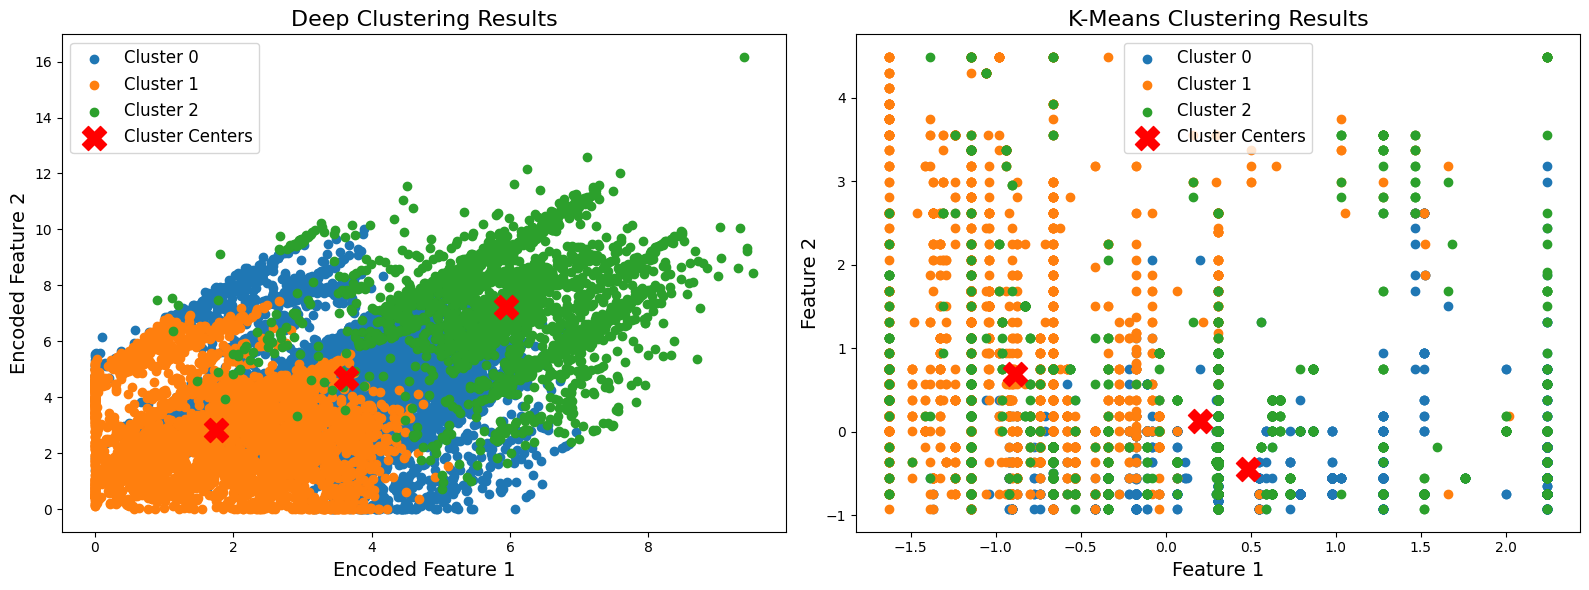

In [38]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

input_layer = Input(shape=(data_scaled.shape[1],))
encoded = Dense(10, activation='relu')(input_layer)
encoded = Dense(5, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(data_scaled.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=256, shuffle=True, validation_split=0.2)

encoded_data = encoder.predict(data_scaled)

kmeans_deep = KMeans(n_clusters=3, random_state=0, max_iter=15000, init='k-means++')
kmeans_labels_deep = kmeans_deep.fit_predict(encoded_data)

kmeans_orig = KMeans(n_clusters=3, random_state=0, max_iter=15000, init='k-means++')
kmeans_labels_orig = kmeans_orig.fit_predict(data_scaled)


n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.T, n_clusters, m=2, error=0.00005, maxiter=15000)  # Set maxiter to 15000

# u contains the membership values for each data point in each cluster
# You can extract the cluster labels based on the maximum membership value for each data point
fcm_labels = np.argmax(u, axis=0)
fcm = fuzz.cluster.cmeans(data_scaled.T, n_clusters, 2, error=0.005, maxiter=15000, init=None)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for cluster_num in range(3):
    cluster_data = encoded_data[kmeans_labels_deep == cluster_num]
    ax[0].scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_num}')
ax[0].scatter(kmeans_deep.cluster_centers_[:, 0], kmeans_deep.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
ax[0].set_title('Deep Clustering Results', fontsize=16)
ax[0].set_xlabel('Encoded Feature 1', fontsize=14)
ax[0].set_ylabel('Encoded Feature 2', fontsize=14)
ax[0].legend(fontsize=12)

for cluster_num in range(3):
    cluster_data = data_scaled[kmeans_labels_orig == cluster_num]
    ax[1].scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_num}')
ax[1].scatter(kmeans_orig.cluster_centers_[:, 0], kmeans_orig.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
ax[1].set_title('K-Means Clustering Results', fontsize=16)
ax[1].set_xlabel('Feature 1', fontsize=14)
ax[1].set_ylabel('Feature 2', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
plt.show()




c:\Users\55387\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\55387\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\55387\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\55387\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

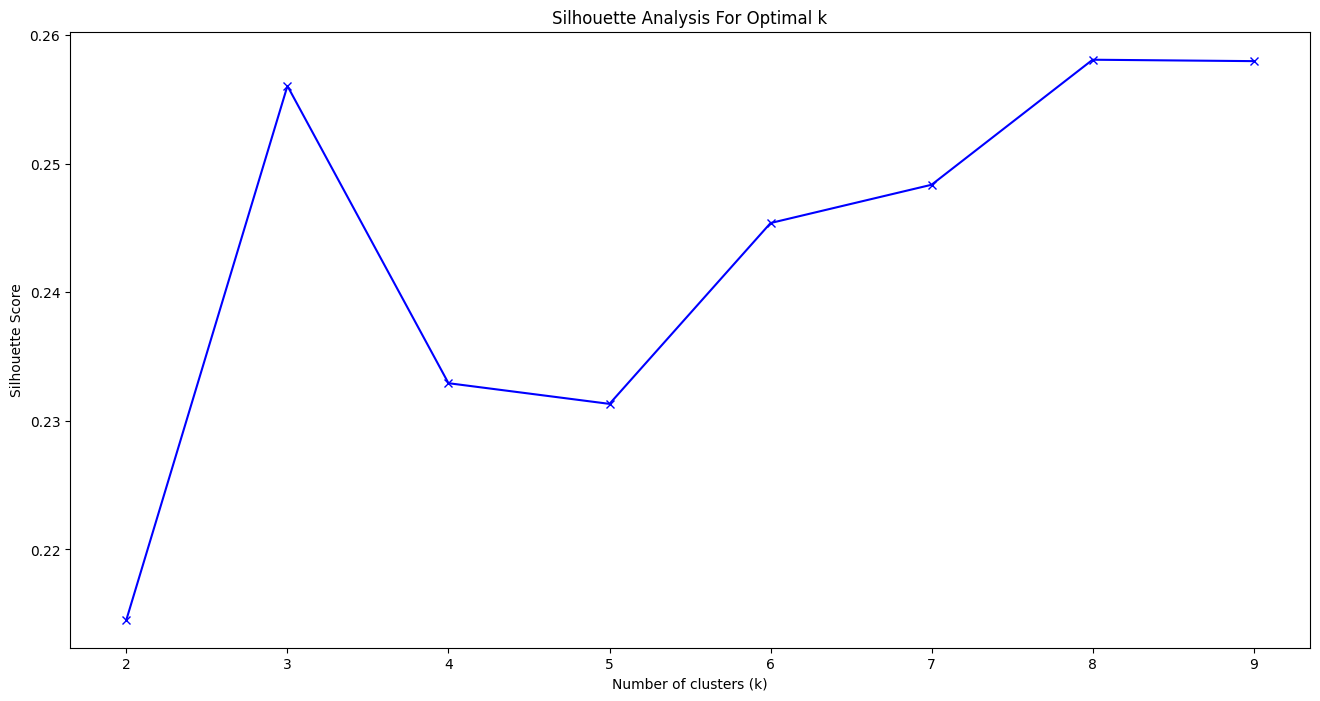

In [39]:
# Calculate silhouette scores for different values of k
sil_scores = []
K = range(2,10)  # Start from 2 as silhouette score is not defined for only 1 cluster
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(data_scaled, labels, metric='euclidean')
    sil_scores.append(sil_score)

# Plot the silhouette scores for each n_clusters
plt.figure(figsize=(16,8))
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

In [40]:
kmeans_orig = KMeans(n_clusters=3, random_state=0, max_iter=15000, init='k-means++')
kmeans_labels_orig = kmeans_orig.fit_predict(data)
# Set column names to feature names
# df_centers.columns = feature_names
# df_centers
pd.DataFrame(kmeans_orig.cluster_centers_)

c:\Users\55387\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,2,3,4
0,371.809042,52.375088,68994.206970,11762.533318,0.555854
1,380.932039,75.257567,9453.341519,19335.282696,0.555406
2,361.569275,60.487437,59638.762563,32107.170854,0.624303


In [41]:
# DL
deep_silhouette = silhouette_score(encoded_data, kmeans_labels_deep)
calinski_harabasz_deep = calinski_harabasz_score(encoded_data, kmeans_labels_deep)
davies_bouldin_deep = davies_bouldin_score(encoded_data, kmeans_labels_deep)

# Kmeans
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels_orig)
calinski_harabasz_orig = calinski_harabasz_score(data_scaled, kmeans_labels_orig)
davies_bouldin_orig = davies_bouldin_score(data_scaled, kmeans_labels_orig)

# FCM
fcm_silhouette = silhouette_score(data_scaled, fcm_labels)
calinski_harabasz_fcm = calinski_harabasz_score(data_scaled, fcm_labels)
davies_bouldin_fcm = davies_bouldin_score(data_scaled, fcm_labels)

print("Evaluation Scores for Deep Clustering (Using Autoencoder):")
print(f"SI Score: {deep_silhouette}")
# print(f"Silhouette Score: {silhouette_deep}")
print(f"Calinski Harabasz Score: {calinski_harabasz_deep}")
print(f"Davies Bouldin Score: {davies_bouldin_deep}")

print("\nEvaluation Scores for Original K-Means Clustering:")
# print(f"Silhouette Score: {silhouette_orig}")
print(f"SI Score: {kmeans_silhouette}")
print(f"Calinski Harabasz Score: {calinski_harabasz_orig}")
print(f"Davies Bouldin Score: {davies_bouldin_orig}")

print("\nEvaluation Scores for FCM Clustering:")
# print(f"Silhouette Score: {silhouette_orig}")
print(f"SI Score: {fcm_silhouette}")
print(f"Calinski Harabasz Score: {calinski_harabasz_fcm}")
print(f"Davies Bouldin Score: {davies_bouldin_fcm}")


Evaluation Scores for Deep Clustering (Using Autoencoder):
SI Score: 0.28510814905166626
Calinski Harabasz Score: 7512.94609887626
Davies Bouldin Score: 1.1997193385552993

Evaluation Scores for Original K-Means Clustering:
SI Score: 0.17228498976108678
Calinski Harabasz Score: 2077.506840997855
Davies Bouldin Score: 1.9052641040231995

Evaluation Scores for FCM Clustering:
SI Score: 0.1440187894402627
Calinski Harabasz Score: 2017.467283684075
Davies Bouldin Score: 1.8327791075279452


In [42]:
user = grouped_dataID.drop(['userID','sessionID','minutesAvailable','disconnectTime_seconds','kWhDelivered','kWhRequested'],axis=1)
session = grouped_datasession.drop(['userID','sessionID','minutesAvailable','disconnectTime_seconds','kWhDelivered','kWhRequested'],axis=1)
user = user.astype(np.float32)

In [43]:
# Extracting the decoder model from the autoencoder
encoded_input = Input(shape=(5,))  # This 5 is from the encoded layer size
decoder_layer1 = autoencoder.layers[-2](encoded_input)
decoder_layer2 = autoencoder.layers[-1](decoder_layer1)
decoder = Model(encoded_input, decoder_layer2)
decoded_cluster_centers = decoder.predict(kmeans_deep.cluster_centers_)
original_cluster_centers = scaler.inverse_transform(decoded_cluster_centers)


1/1 [==============================] - 0s 40ms/step


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

def assign_to_cluster_based_on_similarity(data, cluster_centers):
    assigned_clusters = []
    for data_point in data:
        # Compute similarity of a single data point to all cluster centers
        similarities = cosine_similarity([data_point], cluster_centers)
        # Assign the cluster having the maximum similarity
        assigned_cluster = np.argmax(similarities)
        assigned_clusters.append(assigned_cluster)
    return np.array(assigned_clusters)

# Calculate similarity and assign clusters for 'user' data
user_clusters = assign_to_cluster_based_on_similarity(user.values, original_cluster_centers)
grouped_dataID['cluster'] = user_clusters

# Calculate similarity and assign clusters for 'session' data
session_clusters = assign_to_cluster_based_on_similarity(session.values, original_cluster_centers)
grouped_datasession['cluster'] = session_clusters


## 1028 LSTM

In [53]:
merged_df = pd.merge(df, grouped_dataID[['userID', 'cluster']], on='userID', how='left')
pre_data = merged_df[merged_df['cluster'].notnull()]

Epoch 1/50
158/158 [==============================] - 2s 3ms/step - loss: 108.4624
Epoch 2/50
158/158 [==============================] - 0s 3ms/step - loss: 96.8725
Epoch 3/50
158/158 [==============================] - 0s 3ms/step - loss: 95.4911
Epoch 4/50
158/158 [==============================] - 0s 3ms/step - loss: 95.7787
Epoch 5/50
158/158 [==============================] - 0s 3ms/step - loss: 94.7284
Epoch 6/50
158/158 [==============================] - 0s 3ms/step - loss: 94.8730
Epoch 7/50
158/158 [==============================] - 0s 3ms/step - loss: 94.4029
Epoch 8/50
158/158 [==============================] - 0s 3ms/step - loss: 94.1992
Epoch 9/50
158/158 [==============================] - 0s 3ms/step - loss: 94.2446
Epoch 10/50
158/158 [==============================] - 0s 3ms/step - loss: 94.2214
Epoch 11/50
158/158 [==============================] - 0s 3ms/step - loss: 94.1287
Epoch 12/50
158/158 [==============================] - 0s 3ms/step - loss: 94.3698
Epoch 13/50


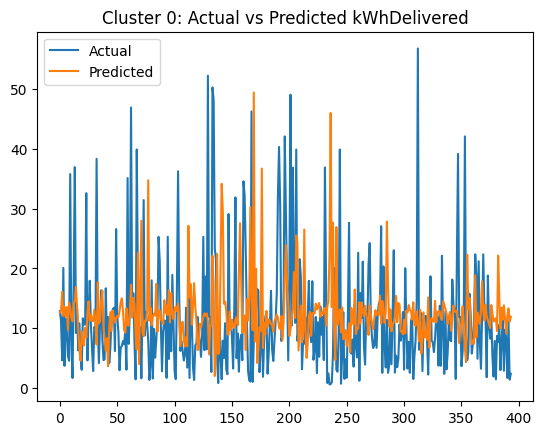

38/38 [==============================] - 0s 2ms/step


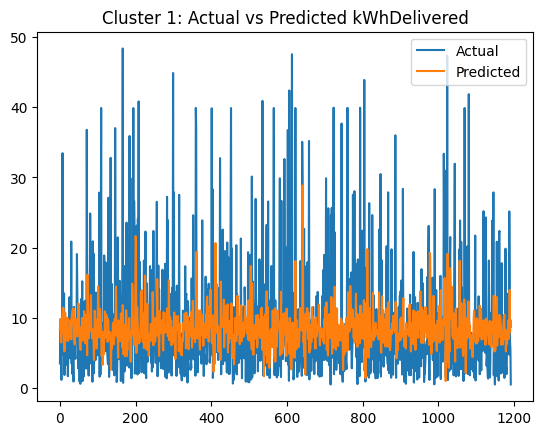

23/23 [==============================] - 0s 2ms/step


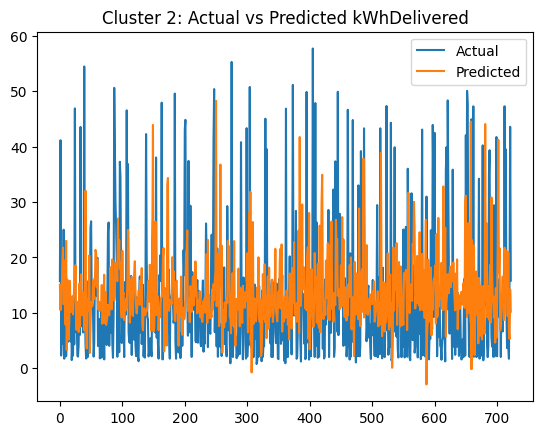

In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Assume pre_data is your DataFrame
# pre_data = ...

# Convert to datetime and sort
pre_data['connectionTime'] = pd.to_datetime(pre_data['connectionTime'])
pre_data = pre_data.sort_values(by='connectionTime')

# Reindex the data for each cluster
clusters = [0, 1, 2]
cluster_data = {cluster: pre_data[pre_data['cluster'] == cluster] for cluster in clusters}

def prepare_data(data, target_col):
    # Assume we are using 10 previous kWhDelivered values to predict the next one
    n_steps = 10
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data['kWhDelivered'].values[i:i+n_steps])
        y.append(data['kWhDelivered'].values[i+n_steps])
    return np.array(X), np.array(y)

# Prepare data for each cluster
prepared_data = {cluster: prepare_data(data, target_col) for cluster, data in cluster_data.items()}

def create_model(n_steps):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, 1)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train models for each cluster
models = {}
n_steps = 10
for cluster in clusters:
    X, y = prepared_data[cluster]
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    model = create_model(n_steps)
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)
    models[cluster] = model

# Evaluate Models and Plot Results
for cluster in clusters:
    X, y = prepared_data[cluster]
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Predict kWhDelivered
    y_pred = models[cluster].predict(X_test)
    
    # Plot actual vs predicted
    plt.figure()
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'Cluster {cluster}: Actual vs Predicted kWhDelivered')
    plt.legend()
    plt.show()
